In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt


In [3]:
# Load audio
audio_path = 'src/loudly.mp3'
y, sr = librosa.load(audio_path)

In [ ]:
# Get onset envelope and detect beats
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
tempo, beat_frames = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)

print(f"Estimated Tempo: {tempo[0]:.2f} BPM")

Estimated Tempo: 89.10 BPM


In [8]:
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
print(f"estimated beats: {beat_times}")

estimated beats: [ 3.36689342  4.04027211  4.69043084  5.36380952  6.03718821  6.71056689
  7.36072562  8.03410431  8.70748299  9.38086168 10.03102041 10.70439909
 11.37777778 12.02793651 12.70131519 13.37469388 14.02485261 14.69823129
 15.37160998 16.04498866 16.69514739 17.36852608 18.04190476 18.71528345
 19.36544218 20.03882086 20.68897959 21.36235828 22.03573696]


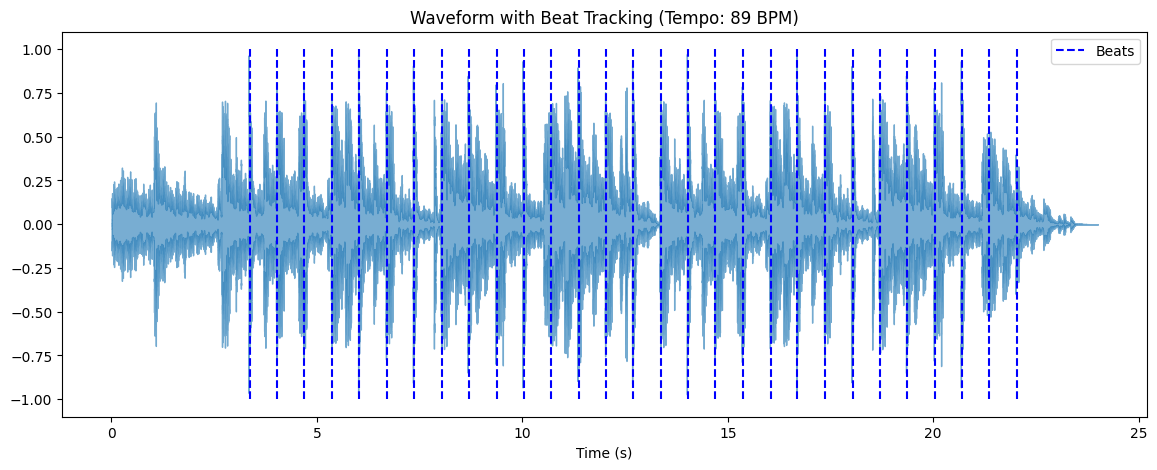

In [9]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.6)
plt.vlines(beat_times, -1, 1, color='b', linestyle='--', label='Beats')
plt.title(f"Waveform with Beat Tracking (Tempo: {int(tempo)} BPM)")
plt.xlabel("Time (s)")
plt.legend()
plt.show()

In [6]:
import numpy as np
from BeatNet.BeatNet import BeatNet


In [12]:
estimator = BeatNet(1, mode='offline', inference_model='DBN', plot=[], thread=False)
beat_times_BN = estimator.process("src/loudly.mp3")
print(f"estimated beats: {beat_times_BN[:,0]}")

estimated beats: [ 0.04  0.72  1.38  2.    2.68  3.34  4.    4.68  5.34  6.    6.68  7.34
  8.    8.66  9.34 10.   10.66 11.32 12.   12.66 13.32 14.   14.68 15.34
 16.   16.66 17.34 18.   18.64 19.34 20.   20.66 21.34 22.   22.68 23.32
 23.96]


/home/penny/anaconda3/envs/loudly/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


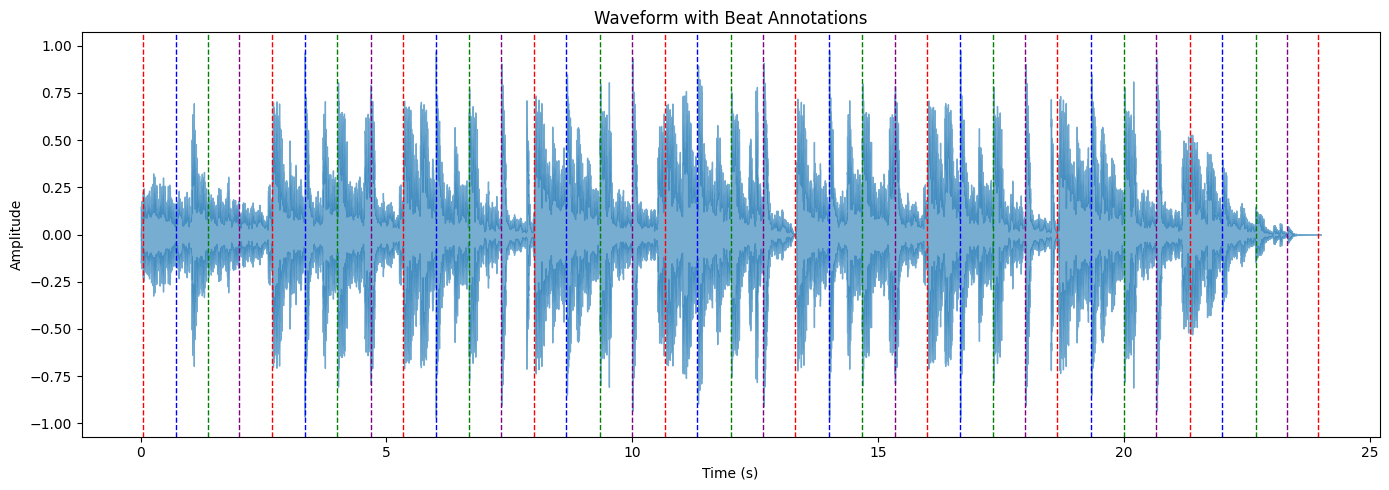

In [13]:
t = np.linspace(0, len(y) / sr, len(y))

beat_colors = {
    1: 'red',
    2: 'blue',
    3: 'green',
    4: 'purple'
}

# Plot waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.6, label='Waveform')

# Overlay beats
for timestamp, beat_type in beat_times_BN:
    color = beat_colors.get(int(beat_type), 'black')
    plt.axvline(x=timestamp, color=color, linestyle='--', linewidth=1)

plt.title('Waveform with Beat Annotations')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

It could be seen that compared to the librosa, BeatNet have detected more beats. However, when setting the 'trim' as false in librosa, the result is the same, as below.

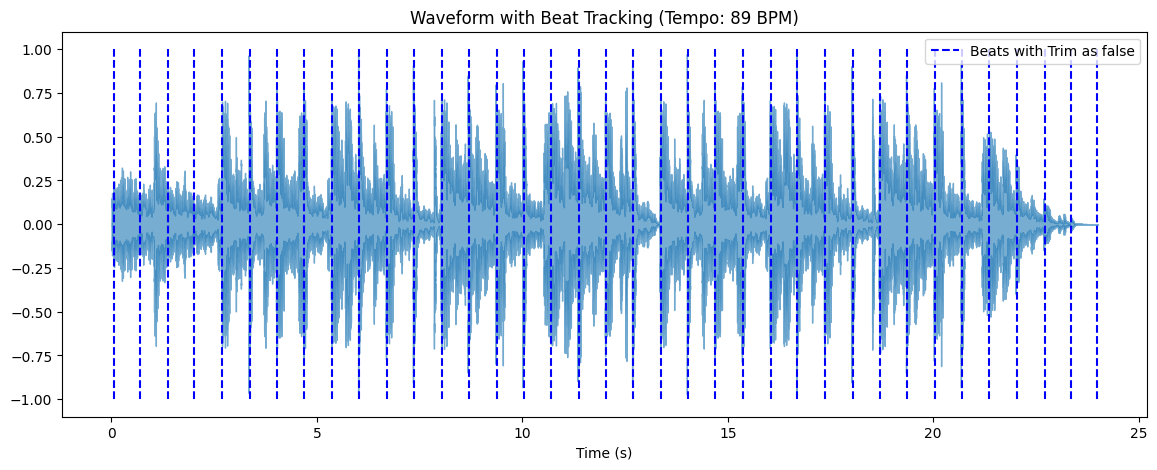

In [15]:
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
tempo, beat_frames = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr, trim=False)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.6)
plt.vlines(beat_times, -1, 1, color='b', linestyle='--', label='Beats with Trim as false')
plt.title(f"Waveform with Beat Tracking (Tempo: {int(tempo)} BPM)")
plt.xlabel("Time (s)")
plt.legend()
plt.show()